In [8]:
import numpy as np
from matplotlib import pyplot as plt

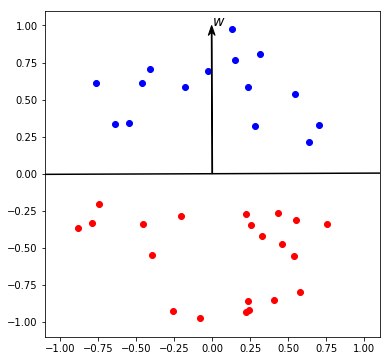

In [340]:
# np.random.seed(2)
size = 50
t = 2*np.pi*np.random.uniform(size=size)
X = np.sqrt(np.random.uniform(size=size)).reshape(-1, 1)*np.array([np.cos(t), np.sin(t)]).T

t0 = 2*np.pi*np.random.uniform()
w0 = np.array([np.cos(t0), np.sin(t0)])
X = X[np.abs(X.dot(w0)) > 0.2]
y = np.sign(X.dot(w0))

def perceptron(X, y, max_iter=1000):
    w = np.zeros_like(X[0])
    ws = [w]
    k = 0
    while np.any(y*X.dot(w) <= 0) and k < max_iter:
        i = np.argmax(y*X.dot(w) <= 0)
        w = w + y[i]*X[i]
        ws.append(w)
    if np.all(y*X.dot(w) > 0):
        return w, ws
    else:
        return None, ws
    
# w = np.array([0, 0])
# ws = [w]
# for j in range(500):
#     if np.all(y*X.dot(w) > 0):
#         break
#     else:
#         for i in range(len(X)):
#             if y[i]*w.dot(X[i]) <= 0:
#                 w = w + y[i]*X[i]
#                 ws.append(w)
#             else:
#                 pass

w, _ = perceptron(X, y)
w = w/np.linalg.norm(w)
# w = ws[-1]/np.linalg.norm(ws[-1])
plt.figure(figsize=(6, 6))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.plot(X[y == -1, 0], X[y == -1, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bo')
x_left, x_right = ax.get_xlim()
u = np.arange(x_left, x_right, 0.1)
plt.plot([2*w[1], -2*w[1]], [-2*w[0], 2*w[0]], 'k')
plt.annotate('$w$', (w[0], w[1]), fontsize=14)
plt.arrow(0, 0, w[0], w[1], facecolor='k', width=0.005, head_width=3*0.015, overhang=0.33,
          capstyle="projecting", length_includes_head=True, zorder=100)
plt.show()

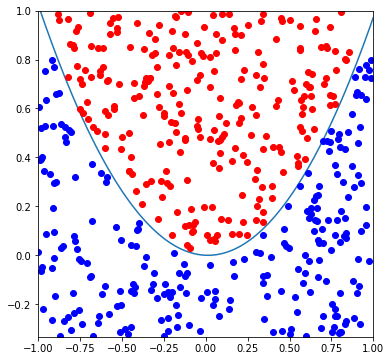

In [363]:
size=500
X = np.array([np.random.uniform(-1, 1, size=size), np.random.uniform(-1/3, 1, size=size)]).T
X = X[np.abs(X[:, 1] - X[:, 0]**2) > 0.02, :]
y = np.sign(X[:, 1] - X[:, 0]**2)

XX = np.hstack([X, np.square(X[:, 0]).reshape(-1, 1)])

w, ws = perceptron(XX, y)

[a,b,c] = w
t = np.arange(-1, 1.01, 0.01)
u = -(a*t + c*t**2)/b
plt.figure(figsize=(6, 6))
plt.xlim(-1, 1)
plt.ylim(-1/3, 1)
plt.plot(t, u)
plt.plot(X[y == -1, 0], X[y == -1, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro')
plt.show()



In [354]:
y*XX.dot(w)

array([ 0.26952959,  0.48523971,  0.3593649 ,  0.71899631,  0.94200986,
        0.42342874,  0.4657902 ,  0.99072555,  0.12591474,  1.21310372,
        0.48425208,  0.95931622,  0.15603329,  0.36230113,  1.35994441,
        0.69157409,  0.37381944,  1.14771203,  1.11351945,  0.53770308,
        1.37588693,  0.67177303,  0.0322632 ,  0.10853585,  0.46272343,
        0.78739634,  0.1039126 ,  0.95869788,  0.30874028,  0.8217588 ,
        1.22807158,  0.78722604,  0.42400734,  0.01516536,  0.51243453,
        1.33857681,  0.09728935,  0.49501691,  0.6973114 ,  0.41126566,
        0.03471146,  0.15868518,  0.81652414,  0.25526556,  0.24103718,
        0.11754828,  0.74680647,  0.16222424,  1.25128793,  0.38886734])

In [347]:
w

array([ 0.02312607,  1.92790876, -1.95431334])

In [307]:
len(X)

469

In [308]:
y*X.dot(w) < 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False,